# Student Performance Analysis

## 1. Loading Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Building and Loading Dataset

### 2.1. Building Dataset

In [3]:

#? Read the xlsx file
raw_file = "./data/KIT_DSE_Batch 12_Consolidated_Grade_DataSet.xlsx"
df = pd.read_excel(raw_file)
# print(df.head(10))


#? select all subjects name
subjects = df.iloc[1,1:].values
# print(subjects)

#? select all students data (score)
student_data = df.iloc[2:, 1:].copy()
# print(student_data)

#? add subjects as columns name in student_data
student_data.columns = subjects
# print(student_data)

#! Data that I've colected through survey
subject_map = {
    'Public Speaking I: TED in the Classroom': ('Soft Subject', 'Practical'),
    'Digital Literacy I': ('Soft Subject', 'Practical'),
    'Academic Reading and Writing': ('Soft Subject', 'Practical'),
    'Science, Technology and Society': ('Soft Subject', 'Theory'),
    'History of Ideas': ('Soft Subject', 'Theory'),
    'The KITian': ('Soft Subject', 'Theory'),
    'Community Service': ('Soft Subject', 'Practical'),
    'Programming in Python': ('Core Subject', 'Practical'),
    'Database Management Systems': ('Core Subject', 'Practical'),
    'Data Structures and Algorithm': ('Core Subject', 'Practical'),
    'Mathematics I': ('Core Subject', 'Theory'),
    'Public Speaking II: TED and the Society': ('Soft Subject', 'Practical'),
    'Digital Literacy II: Technology Trends, Issues, and Challenges in the Digital Age': ('Soft Subject', 'Practical'),
    'Technical Writing': ('Soft Subject', 'Practical'),
    'The Arts and the Humanities': ('Soft Subject', 'Theory'),
    'Global Business Leadership and International Relations': ('Soft Subject', 'Theory'),
    'Introduction to Accounting and Financial Management': ('Soft Subject', 'Theory'),
    'Comprehensive Japanese': ('Soft Subject', 'Practical'),
    'Computer Networks': ('Core Subject', 'Theory'),
    'Full Stack Development': ('Core Subject', 'Practical'),
    'Java with Functional Programming': ('Core Subject', 'Practical'),
    'Mathematics II: Modern Algebra and Number Theory': ('Core Subject', 'Practical')
}

#? rearrange subjects
rearrange_subject = []
for subject in subject_map.keys():
	rearrange_subject.append(subject)

student_data_rearrange = student_data[rearrange_subject]
# print(student_data_rearrange)


#? convert to sample based on each subject and each student
student_dataset = student_data_rearrange.melt(var_name="Subject", value_name="Score")
# print(student_dataset)


#? Add semester for each subject
semester_map = {}
for i, subject in enumerate(rearrange_subject):
    semester_map[subject] = "Semester I" if i < 11 else "Semester II"

student_dataset["Semester"] = student_dataset["Subject"].map(semester_map)
# print(student_dataset.loc[406, ["Subject", "Semester"]])


#? Add Type of Subject and Nature of Subject
student_dataset['Type of Subject'] = student_dataset['Subject'].map(lambda x: subject_map[x][0])
student_dataset['Nature of Subject'] = student_dataset['Subject'].map(lambda x: subject_map[x][1])
# print(student_dataset.head(10))
# print(student_dataset.loc[407, ["Subject", "Type of Subject", "Nature of Subject"]])

#? Reorder columns
student_dataset = student_dataset[[
	"Subject", 
	"Semester", 
	"Type of Subject", 
	"Nature of Subject",
	"Score"
]]
# print(student_dataset.head(10))


#? Save to CSV
csv_path = "./data/KIT_Student_Performance.csv"
student_dataset.to_csv(csv_path, index=False)

### 2.2. Loading Dataset

In [4]:
dataset = pd.read_csv('./data/KIT_Student_Performance.csv')

In [5]:
dataset.head(6)

,Subject,Semester,Type of Subject,Nature of Subject,Score
0,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,94.0
1,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,87.0
2,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,92.0
3,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,95.0
4,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,96.0
5,Public Speaking I: TED in the Classroom,Semester I,Soft Subject,Practical,92.0


## 3. Data Summary

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Subject            814 non-null    object 
 1   Semester           814 non-null    object 
 2   Type of Subject    814 non-null    object 
 3   Nature of Subject  814 non-null    object 
 4   Score              814 non-null    float64
dtypes: float64(1), object(4)
memory usage: 31.9+ KB


In [7]:
dataset.describe()

,Score
count,814.000000
mean,82.222088
std,11.329789
min,60.000000
25%,73.000000
50%,85.000000
75%,92.000000
max,99.600000


## 4. Data Visualization

### 4.1. Visualizing the Distribution of Scores

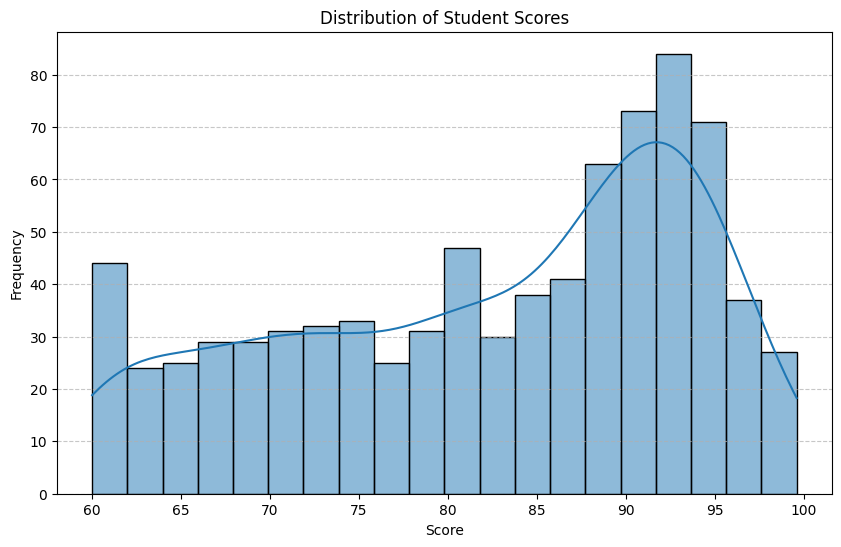

Interpretation: This histogram shows how frequently different score ranges appear. Look for its shape (e.g., normal, skewed), central tendency, and spread.


In [8]:

#? Visualize the Class Distribution (Distribution of 'Score')
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Score', bins=20, kde=True) # kde=True adds a density curve
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Frequency') # count of students in each score range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Interpretation: This histogram shows how frequently different score ranges appear. Look for its shape (e.g., normal, skewed), central tendency, and spread.")



### 4.2. Visualizing the Scatter Plot of Scores

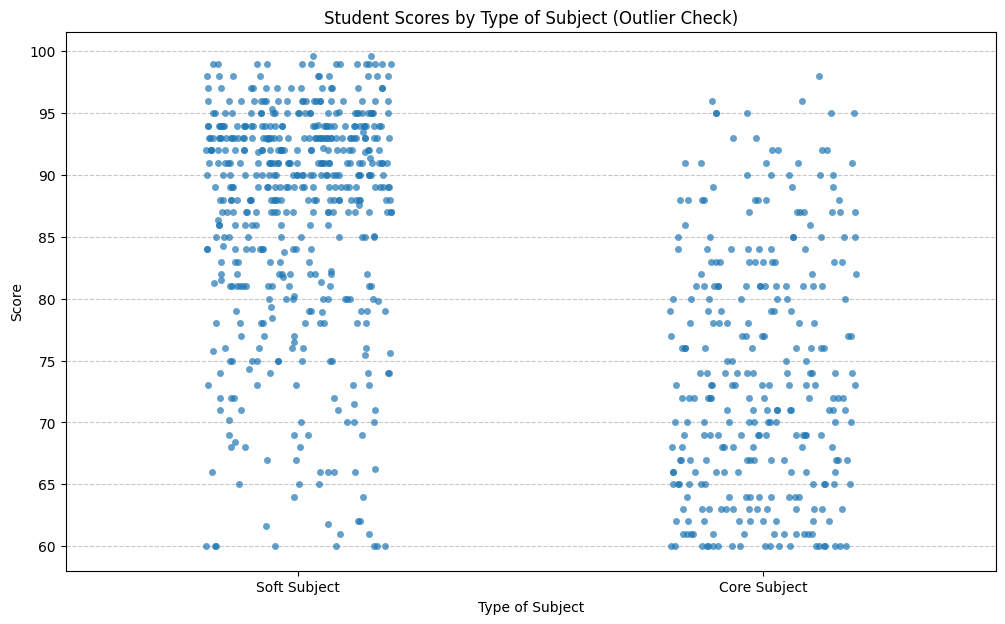

In [9]:

#? Visualize the scores by 'Type of Subject' to check for outliers
plt.figure(figsize=(12, 7))
sns.stripplot(x='Type of Subject', y='Score', data=dataset, jitter=0.2, alpha=0.7, size=5)
plt.title('Student Scores by Type of Subject (Outlier Check)')
plt.xlabel('Type of Subject')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

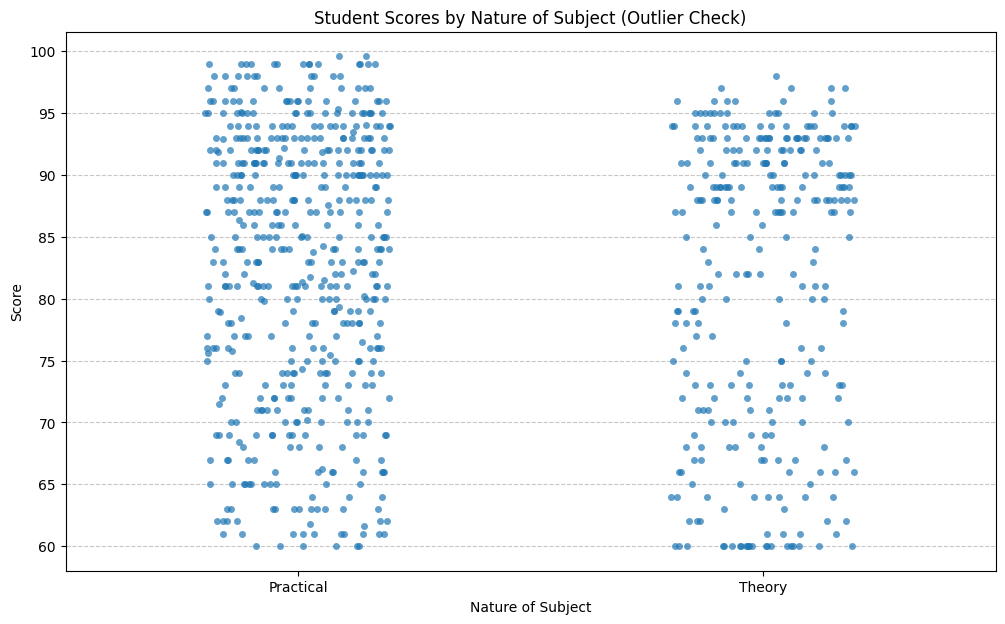

In [10]:

#? Visualize the scores by 'Nature of Subject' to check for outliers
plt.figure(figsize=(12, 7))
sns.stripplot(x='Nature of Subject', y='Score', data=dataset, jitter=0.2, alpha=0.7, size=5)
plt.title('Student Scores by Nature of Subject (Outlier Check)')
plt.xlabel('Nature of Subject')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

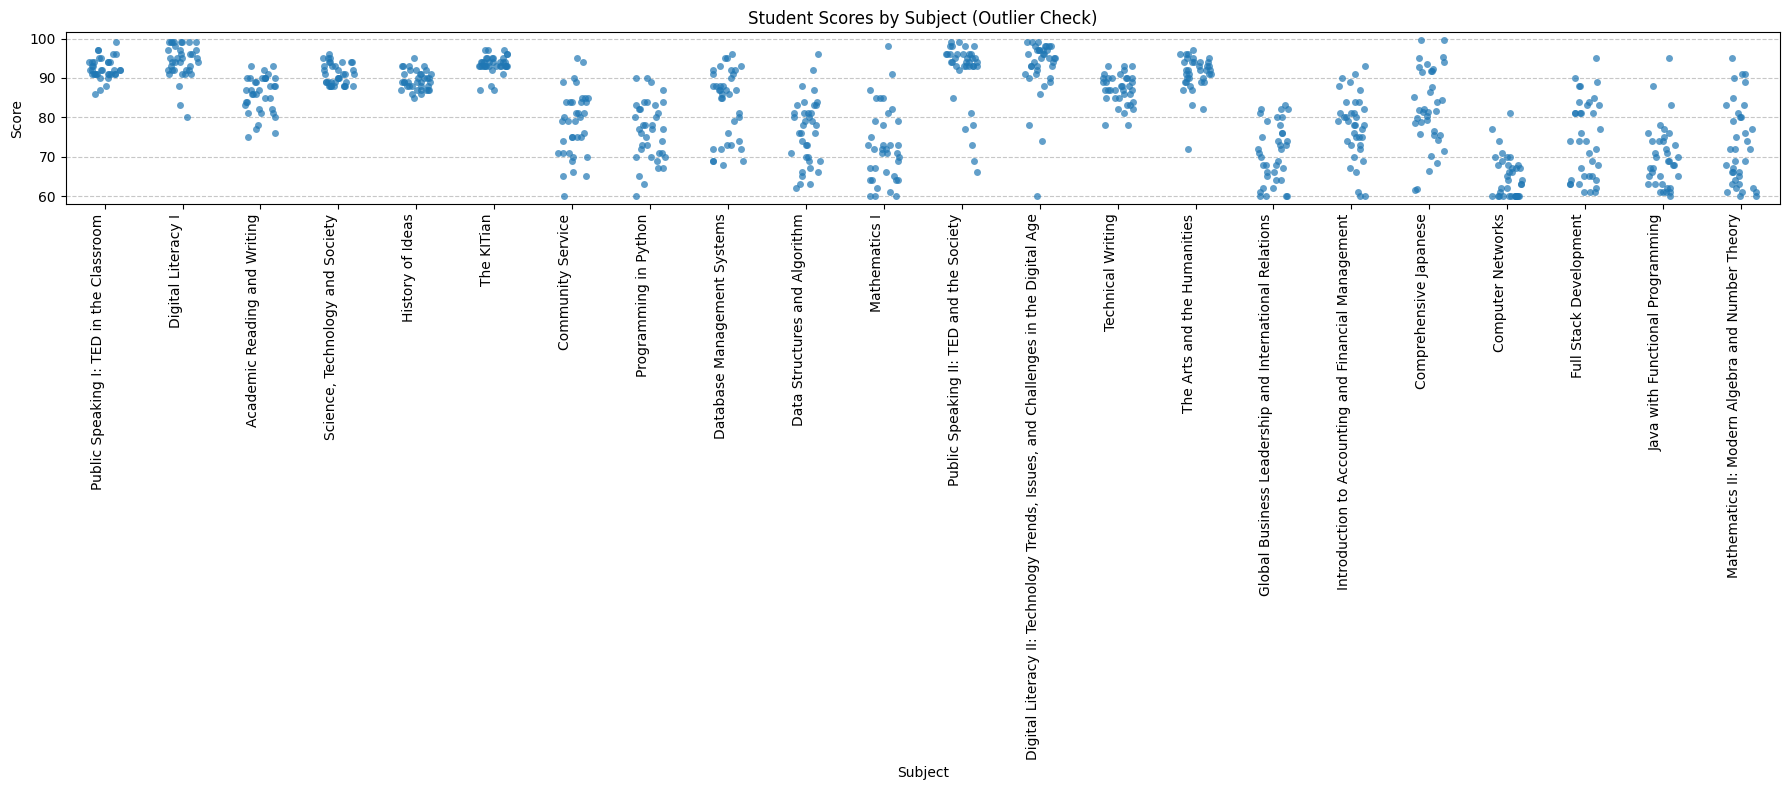

In [11]:

#? Visualize the scores by 'Subject' to check for outliers
plt.figure(figsize=(18, 8)) # Increased figure width to give more space
sns.stripplot(x='Subject', y='Score', data=dataset, jitter=0.2, alpha=0.7, size=5)
plt.title('Student Scores by Subject (Outlier Check)')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, ha='right') # Rotate labels by 90 degrees and align them to the right
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

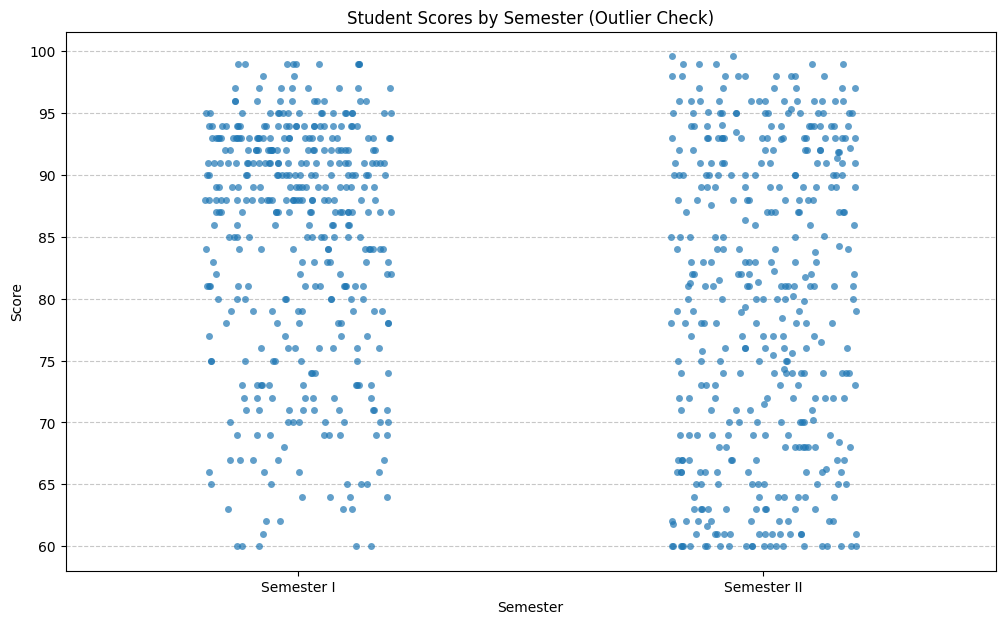

In [12]:

#? Visualize the scores by 'Semester' to check for outliers
plt.figure(figsize=(12, 7))
sns.stripplot(x='Semester', y='Score', data=dataset, jitter=0.2, alpha=0.7, size=5)
plt.title('Student Scores by Semester (Outlier Check)')
plt.xlabel('Semester')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5. Data Preprocessing

### 5.1. Data Cleaning

#### Outliers Detection

In [13]:
print("\n--- Programmatic Outlier Detection using IQR Method ---")

# We will check for outliers in the 'Score' column, as it's our primary numerical variable.
scores = dataset['Score']

# Calculate Q1 (25th percentile)
Q1 = scores.quantile(0.25)
print(f"First Quartile (Q1): {Q1:.2f}")

# Calculate Q3 (75th percentile)
Q3 = scores.quantile(0.75)
print(f"Third Quartile (Q3): {Q3:.2f}")

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR): {IQR:.2f}")

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")

# Identify outliers
outliers = scores[(scores < lower_bound) | (scores > upper_bound)]

if not outliers.empty:
    print(f"\nNumber of detected outliers in 'Score' column: {len(outliers)}")
    print("Outlier Scores (values outside the bounds):")
    print(outliers.to_markdown(numalign="left", stralign="left"))
    print("\nThese are the scores that fall significantly outside the typical range based on the IQR method.")
else:
    print("\nNo outliers detected in the 'Score' column based on the IQR method.")


--- Programmatic Outlier Detection using IQR Method ---
First Quartile (Q1): 73.00
Third Quartile (Q3): 92.00
Interquartile Range (IQR): 19.00
Lower Bound for Outliers: 44.50
Upper Bound for Outliers: 120.50

No outliers detected in the 'Score' column based on the IQR method.


#### Missing Values Check

In [14]:
print("--- MISSING VALUES CHECK ---")
print(f"Dataset shape: {dataset.shape}")
print(f"Total missing values per column:")
missing_values = dataset.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print(f"\nTotal missing values in dataset: {missing_values.sum()}")
    # Handle missing values if any exist
    # For now, we'll remove rows with missing values
    dataset_clean = dataset.dropna()
    print(f"Dataset shape after removing missing values: {dataset_clean.shape}")
else:
    print("No missing values found in the dataset.")
    dataset_clean = dataset.copy()


--- MISSING VALUES CHECK ---
Dataset shape: (814, 5)
Total missing values per column:
Subject              0
Semester             0
Type of Subject      0
Nature of Subject    0
Score                0
dtype: int64
No missing values found in the dataset.


### 5.2. Data Standardization

#### Separate the target feature from other features

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns: {list(dataset.columns[:-1])}")
print(f"Target column: {dataset.columns[-1]}")

Features (X) shape: (814, 4)
Target (y) shape: (814,)

Feature columns: ['Subject', 'Semester', 'Type of Subject', 'Nature of Subject']
Target column: Score


#### Encoding Categorical Variables

In [16]:
#- use One-Hot Encoding to converts these text categories into numerical '0's and '1's.
ct = ColumnTransformer(
	transformers=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0,1,2,3])],
	remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

print(f"Shape after encoding: {X_encoded.shape}")

Shape after encoding: (814, 28)


#### Standardize the features using z score

In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the encoded features
X_standardized = scaler.fit_transform(X_encoded)

print(f"Standardized features shape: {X_standardized.shape}")

# Display statistics before and after standardization
print("\n--- STANDARDIZATION RESULTS ---")
print("Before standardization:")
print(f"Mean of encoded features: {np.mean(X_encoded, axis=0)[:5]}...")  # Show first 5
print(f"Std of encoded features: {np.std(X_encoded, axis=0)[:5]}...")   # Show first 5

print("\nAfter standardization:")
print(f"Mean of standardized features: {np.mean(X_standardized, axis=0)[:5]}...")
print(f"Std of standardized features: {np.std(X_standardized, axis=0)[:5]}...")


Standardized features shape: (814, 28)

--- STANDARDIZATION RESULTS ---
Before standardization:
Mean of encoded features: [0.04545455 0.04545455 0.04545455 0.04545455 0.04545455]...
Std of encoded features: [0.2082989 0.2082989 0.2082989 0.2082989 0.2082989]...

After standardization:
Mean of standardized features: [-6.90070441e-16  2.11453841e-15  1.52082824e-15  1.64494408e-15
  7.24850155e-16]...
Std of standardized features: [1. 1. 1. 1. 1.]...


In [18]:
print("\n--- FINAL PREPROCESSING RESULTS ---")
print(f"Original dataset shape: {dataset.shape}")
print(f"Final preprocessed features shape: {X_standardized.shape}")
print(f"Final target variable shape: {y.shape}")

# Create a summary dataframe for display
preprocessing_summary = pd.DataFrame({
    'Step': ['Original Data', 'After Missing Value Check', 'After Outlier Analysis', 
             'After Encoding', 'After Standardization'],
    'Features Shape': [dataset.iloc[:, :-1].shape, X.shape, X.shape, 
                      X_encoded.shape, X_standardized.shape],
    'Target Shape': [dataset.iloc[:, -1].shape, y.shape, y.shape, y.shape, y.shape],
    'Notes': ['Raw data', 'No missing values found', 'Outliers kept for analysis', 
              'One-hot encoded categoricals', 'Z-score standardized']
})

print("\nPreprocessing Summary:")
print(preprocessing_summary.to_string(index=False))

print(f"\nSample of target values (first 10):")
print(y[:10])



--- FINAL PREPROCESSING RESULTS ---
Original dataset shape: (814, 5)
Final preprocessed features shape: (814, 28)
Final target variable shape: (814,)

Preprocessing Summary:
                     Step Features Shape Target Shape                        Notes
            Original Data       (814, 4)       (814,)                     Raw data
After Missing Value Check       (814, 4)       (814,)      No missing values found
   After Outlier Analysis       (814, 4)       (814,)   Outliers kept for analysis
           After Encoding      (814, 28)       (814,) One-hot encoded categoricals
    After Standardization      (814, 28)       (814,)         Z-score standardized

Sample of target values (first 10):
[94. 87. 92. 95. 96. 92. 94. 92. 91. 92.]


## 6. Split the dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state = 42)

In [20]:
print(f"Training set - Features shape: {X_train.shape}")
print(f"Training set - Target shape: {y_train.shape}")
print(f"Test set - Features shape: {X_test.shape}")
print(f"Test set - Target shape: {y_test.shape}")

print(f"\nTraining set size: {len(X_train)} samples ({len(X_train)/len(X_standardized)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X_standardized)*100:.1f}%)")

# Display some statistics
print(f"\nTarget variable statistics:")
print(f"Training set - Mean: {np.mean(y_train):.2f}, Std: {np.std(y_train):.2f}")
print(f"Test set - Mean: {np.mean(y_test):.2f}, Std: {np.std(y_test):.2f}")

Training set - Features shape: (651, 28)
Training set - Target shape: (651,)
Test set - Features shape: (163, 28)
Test set - Target shape: (163,)

Training set size: 651 samples (80.0%)
Test set size: 163 samples (20.0%)

Target variable statistics:
Training set - Mean: 82.09, Std: 11.42
Test set - Mean: 82.75, Std: 10.90


## 7. Choosing ML algorithm

In [21]:

print("\n=== MACHINE LEARNING ALGORITHM SELECTION ===")

# For student performance prediction (regression task), we'll use multiple algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

# Initialize different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

print("Selected Machine Learning Algorithms:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i}. {name}: {type(model).__name__}")

print(f"\nTotal algorithms to evaluate: {len(models)}")


=== MACHINE LEARNING ALGORITHM SELECTION ===
Selected Machine Learning Algorithms:
1. Linear Regression: LinearRegression
2. Decision Tree: DecisionTreeRegressor
3. Random Forest: RandomForestRegressor
4. Support Vector Regression: SVR

Total algorithms to evaluate: 4


## 8. Training the model

In [22]:
print("\n=== MODEL TRAINING AND EVALUATION ===")

# Dictionary to store results
results = {}
trained_models = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    results[name] = {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R²': test_r2,
        'Predictions': y_pred_test
    }
    
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

# Create comprehensive results dataframe
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[model]['Train R²'] for model in results.keys()],
    'Test R²': [results[model]['Test R²'] for model in results.keys()],
    'Train RMSE': [results[model]['Train RMSE'] for model in results.keys()],
    'Test RMSE': [results[model]['Test RMSE'] for model in results.keys()],
    'Train MAE': [results[model]['Train MAE'] for model in results.keys()],
    'Test MAE': [results[model]['Test MAE'] for model in results.keys()]
})

# Sort by Test R² (higher is better)
results_df = results_df.sort_values('Test R²', ascending=False)

print("\n=== MODEL COMPARISON RESULTS ===")
print(results_df.round(4))

# Find the best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['Predictions']

print(f"\n=== BEST MODEL ===")
print(f"Best Model: {best_model_name}")
print(f"Test R² Score: {results_df.iloc[0]['Test R²']:.4f}")
print(f"Test RMSE: {results_df.iloc[0]['Test RMSE']:.4f}")
print(f"Test MAE: {results_df.iloc[0]['Test MAE']:.4f}")


=== MODEL TRAINING AND EVALUATION ===

--- Training Linear Regression ---
Training R²: 0.6194
Test R²: 0.5875
Test RMSE: 7.0009

--- Training Decision Tree ---
Training R²: 0.6194
Test R²: 0.5875
Test RMSE: 7.0009

--- Training Random Forest ---


Training R²: 0.6192
Test R²: 0.5871
Test RMSE: 7.0047

--- Training Support Vector Regression ---
Training R²: 0.5966
Test R²: 0.5749
Test RMSE: 7.1071

=== MODEL COMPARISON RESULTS ===
                       Model  Train R²  Test R²  Train RMSE  Test RMSE  \
0          Linear Regression    0.6194   0.5875      7.0470     7.0009   
1              Decision Tree    0.6194   0.5875      7.0470     7.0009   
2              Random Forest    0.6192   0.5871      7.0483     7.0047   
3  Support Vector Regression    0.5966   0.5749      7.2549     7.1071   

   Train MAE  Test MAE  
0     5.2450    5.1999  
1     5.2450    5.1999  
2     5.2546    5.2072  
3     5.3534    5.3096  

=== BEST MODEL ===
Best Model: Linear Regression
Test R² Score: 0.5875
Test RMSE: 7.0009
Test MAE: 5.1999



=== MODEL EVALUATION VISUALIZATIONS ===


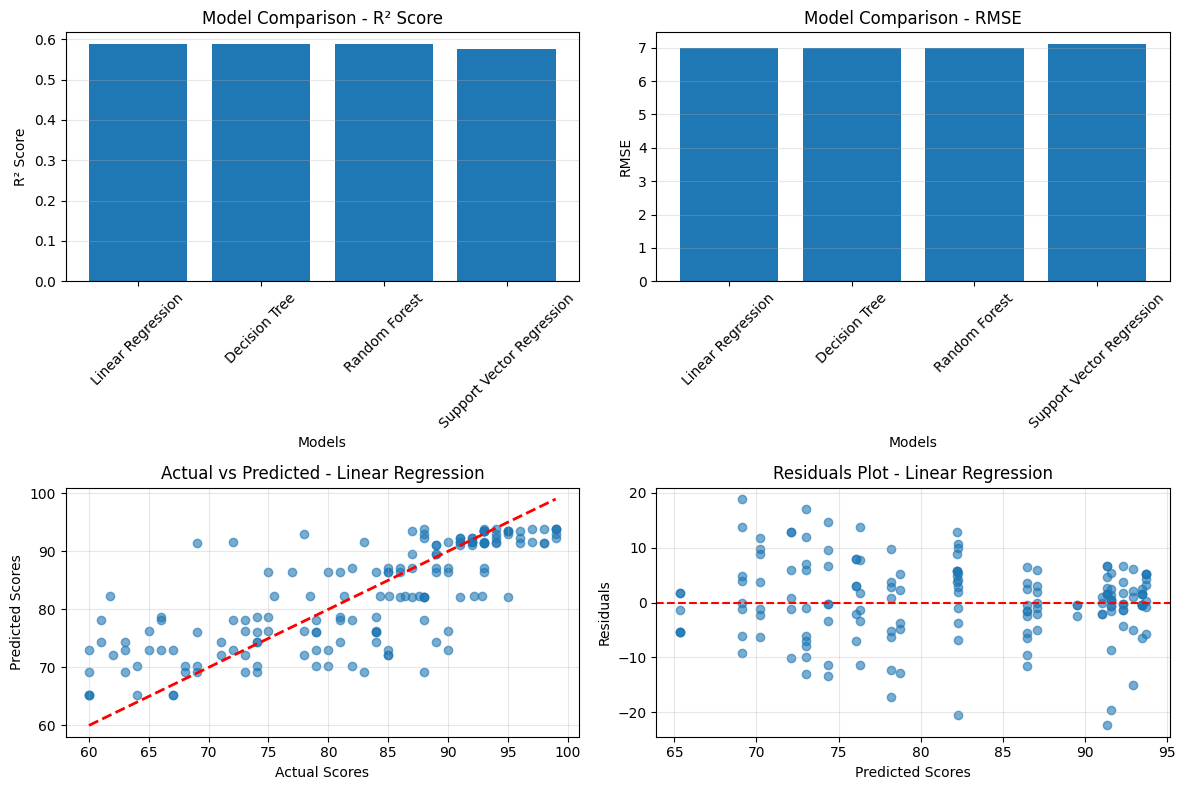


=== MODEL PERFORMANCE INTERPRETATION ===
Model Performance: Fair
The Linear Regression explains 58.8% of the variance in student scores.


In [23]:
### Model Evaluation Visualizations

print("\n=== MODEL EVALUATION VISUALIZATIONS ===")

# 1. Model Comparison Bar Plot
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(results_df))

plt.subplot(2, 2, 1)
plt.bar(x_pos, results_df['Test R²'])
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.xticks(x_pos, results_df['Model'], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(2, 2, 2)
plt.bar(x_pos, results_df['Test RMSE'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.xticks(x_pos, results_df['Model'], rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Actual vs Predicted for Best Model
plt.subplot(2, 2, 3)
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.grid(True, alpha=0.3)

# 3. Residuals Plot for Best Model
plt.subplot(2, 2, 4)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - {best_model_name}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model performance interpretation
print("\n=== MODEL PERFORMANCE INTERPRETATION ===")
best_r2 = results_df.iloc[0]['Test R²']
if best_r2 > 0.8:
    performance = "Excellent"
elif best_r2 > 0.6:
    performance = "Good"
elif best_r2 > 0.4:
    performance = "Fair"
else:
    performance = "Poor"

print(f"Model Performance: {performance}")
print(f"The {best_model_name} explains {best_r2*100:.1f}% of the variance in student scores.")

## 9. Inference

In [ ]:
new_input_data_1 = pd.DataFrame([[
    'Java with Functional Programming', # Subject
    'Semester 2',                      # Semester
    'Core Subject',                    # Type of Subject
    'Theoretical'                      # Nature of Subject
]], columns=['Subject', 'Semester', 'Type of Subject', 'Nature of Subject'])

print("\nNew raw input data 1:")
print(new_input_data_1.to_markdown(index=False, numalign="left", stralign="left"))

new_input_processed_1 = ct.transform(new_input_data_1)
predicted_score_1 = best_model.predict(new_input_processed_1)

print(f"Predicted Score for new input 1: {predicted_score_1[0]:.2f}")


New raw input data 1:
| Subject                          | Semester   | Type of Subject   | Nature of Subject   |
|:---------------------------------|:-----------|:------------------|:--------------------|
| Java with Functional Programming | Semester 1 | Core Subject      | Theoretical         |
Predicted Score for new input 1: 78.68


In [32]:
new_input_data_2 = pd.DataFrame([[
    'Mathematics II: Modern Algebra and Number Theory', # Subject
    'Semester 2',                      # Semester
    'Core Subject',                    # Type of Subject
    'Practical'                      # Nature of Subject
]], columns=['Subject', 'Semester', 'Type of Subject', 'Nature of Subject'])

print("\nNew raw input data 2:")
print(new_input_data_2.to_markdown(index=False, numalign="left", stralign="left"))

new_input_processed_2 = ct.transform(new_input_data_2)
predicted_score_2 = best_model.predict(new_input_processed_2)

print(f"Predicted Score for new input 2: {predicted_score_2[0]:.2f}")


New raw input data 2:
| Subject                                          | Semester   | Type of Subject   | Nature of Subject   |
|:-------------------------------------------------|:-----------|:------------------|:--------------------|
| Mathematics II: Modern Algebra and Number Theory | Semester 2 | Core Subject      | Practical           |
Predicted Score for new input 2: 79.92


In [33]:
new_input_data_3 = pd.DataFrame([[
    'Digital Literacy I', # Subject
    'Semester 1',                      # Semester
    'Soft Subject',                    # Type of Subject
    'Practical'                      # Nature of Subject
]], columns=['Subject', 'Semester', 'Type of Subject', 'Nature of Subject'])

print("\nNew raw input data 3:")
print(new_input_data_3.to_markdown(index=False, numalign="left", stralign="left"))

new_input_processed_3 = ct.transform(new_input_data_3)
predicted_score_3 = best_model.predict(new_input_processed_3)

print(f"Predicted Score for new input 3: {predicted_score_3[0]:.2f}")


New raw input data 3:
| Subject            | Semester   | Type of Subject   | Nature of Subject   |
|:-------------------|:-----------|:------------------|:--------------------|
| Digital Literacy I | Semester 1 | Soft Subject      | Practical           |
Predicted Score for new input 3: 86.02


In [34]:
new_input_data_4 = pd.DataFrame([[
    'Programming in Python', # Subject
    'Semester 1',                      # Semester
    'Core Subject',                    # Type of Subject
    'Practical'                      # Nature of Subject
]], columns=['Subject', 'Semester', 'Type of Subject', 'Nature of Subject'])

print("\nNew raw input data 4:")
print(new_input_data_4.to_markdown(index=False, numalign="left", stralign="left"))

new_input_processed_4 = ct.transform(new_input_data_4)
predicted_score_4 = best_model.predict(new_input_processed_4)

print(f"Predicted Score for new input 4: {predicted_score_4[0]:.2f}")


New raw input data 4:
| Subject               | Semester   | Type of Subject   | Nature of Subject   |
|:----------------------|:-----------|:------------------|:--------------------|
| Programming in Python | Semester 1 | Core Subject      | Practical           |
Predicted Score for new input 4: 79.90
